In [3]:
from brian2 import *
import brian2.numpy_ as np

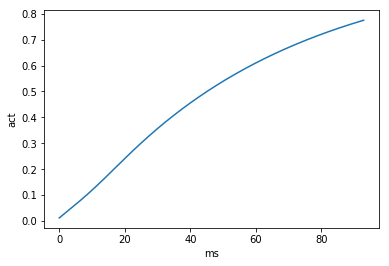

In [43]:
start_scope()
#Implementing the independent Km current.
duration = 100*ms
#Parameters
C = 1*ufarad
gKm = 0.0001*siemens
VKm = -90*mV
b0Km = 60*ms
vhalfl = -40*mV
vhalft = -42*mV
sh = 24*mV
kl = -10*mV
a0t = 0.003/ms
zetat = 7
gmt = 0.4/mV
V0 = -60*mV

eqs = Equations('''
                    #I = IKm 
                    dV/dt = (IKm + I)/C : volt
                    IKm = gKm*mKm*(V-VKm) : amp
                    dmKm/dt = (infKm - mKm)/tauKm : 1
                    infKm = (1/(1 + exp((V-vhalfl-sh)/(kl)))) : 1
                    tauKm = b0Km + bettKm/(a0t*(1+alptKm)) : second
                    alptKm = exp(0.0378*(mV**-1)*zetat*(V-vhalft-sh)) : 1
                    bettKm = exp(0.0378*zetat*gmt*(V-vhalft-sh)) : 1
                    I : amp
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

#group.V = V0
#group.V = -40*mV
group.mKm = (1/(1 + exp((V0-vhalfl-sh)/(kl))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-70, 20, 100)*mV
taus = []
Ikms = []
ns = []
nn = []
#for volt in voltages:
    # Restore the original state of the network
 #   restore()
  #  group.V = volt
    # Run it with the new value of tau
 #   run(300*ms)
    #taus.append(M.tauKm[0])
    #Ikms.append(M.IKm[0])
    #ns.append(M.infKm[0])
   # nn.append(M.mKm[0])
run(1000*ms)
#figure(1)
#plot(voltages, taus)
#xlabel('Voltage')
#ylabel('Tau');

#figure(2)
#plot(voltages, Ikms)
#xlabel('Volt')
#ylabel('Amps');

figure(1)
plot(M.t/ms, M.mKm[0])
xlabel('ms')
ylabel('act');

show()

#Questions:
#Missing units in constants? Whats the reversal potential?

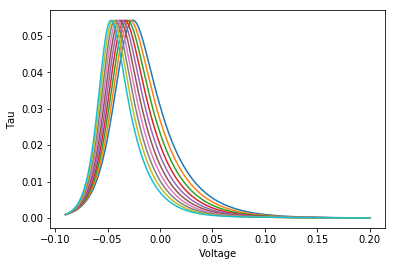

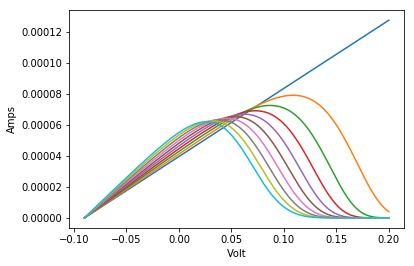

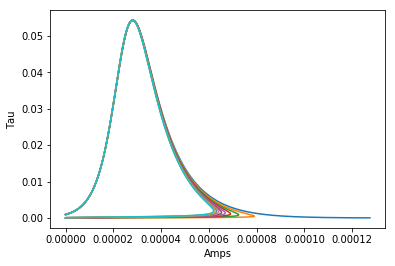

In [9]:
start_scope()
#Implementing the independent Kd current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKdmax=0.00045*siemens
vhalfm = -33*mV
zetam = 3/mV
sh = 0*mV
a0n = 0.01/ms
gmn = 0.7
q10 = 1
temp = 34
VKd = -90*mV
V0 = -65*mV



eqs = Equations('''
                    dV/dt = (IKd + I)/C : volt
                    IKd = gKd*(V-VKd) : amp
                    gKd = gKdmax*mKd : siemens
                    dmKd/dt = (infmKd - mKd)/taum : 1
                    infmKd = 1/(1+alpm) : 1
                    taum = betm/(qt*a0n*(1+alpm)) : second
                    alpm = exp(0.001*zetam*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    betm = exp(0.001*zetam*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    I : amp                
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

group.mKd = 1/(1+exp(0.001*zetam*(V0-vhalfm-sh)*96480/(8.315*(273.16 + temp))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, 200, 300)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKd[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()
#Questions
####if (taun<nmax) {taun=nmax/qt}?????
#What about the temperature?

WARNING    neurongroup_1's variable 'mKa' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_1's variable 'V' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


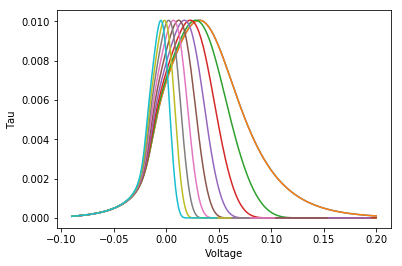

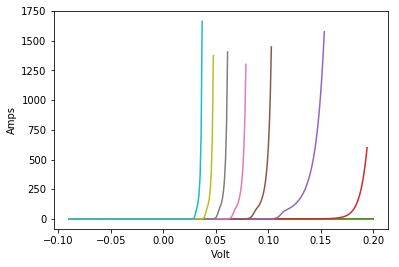

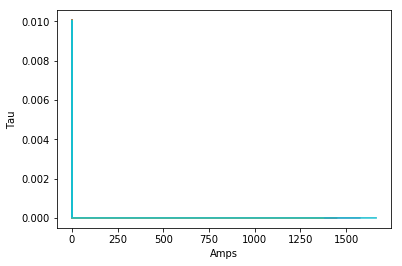

In [19]:
start_scope()
#Implementing the independent Ka current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKamax = 0.07*siemens
VKa = -77*mV
temp = 34
vhalfm = 11*mV
sh = 24*mV
zetam = -1.5/mV
pw = -1/mV
tq = -40*mV
qq = 5*mV
gmn = 0.55
q10 = 5
a0n = 0.05/ms
V0 = -65*mV

eqs = Equations('''
                    dV/dt = (IKa + I)/C : volt
                    IKa = gKa*(V-VKa) : amp
                    gKa = gKamax*mKa : siemens
                    dmKa/dt = (infmKa - mKa)/taum : 1
                    infmKa = 1/(1 + alpm) : 1                    
                    zeta = zetam + pw/(1+exp((V-tq-sh)/qq)) : 1/volt
                    taum = betm/(qt*a0n*(1+alpm)) : second
                    alpm = exp(0.001*zeta*(V-vhalfm-sh)*96480/(8.315*(273.16+temp))) : 1
                    betm = exp(0.001*zeta*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16+temp))) : 1
                    qt = q10**((temp-24)/10) : 1
                    I : amp
                    
                    #if (taun<nmin) {taun=nmin}?????
                               
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

zetaIn = zetam + pw/(1+exp((V0-tq-sh)/qq))
group.mKa = 1/(1 + exp(0.001*zetaIn*(V0-vhalfm-sh)*96480/(8.315*(273.16+temp))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, 200, 300)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKa[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()

WARNING    neurongroup's variable 'mKdr' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


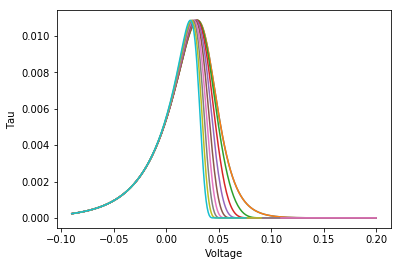

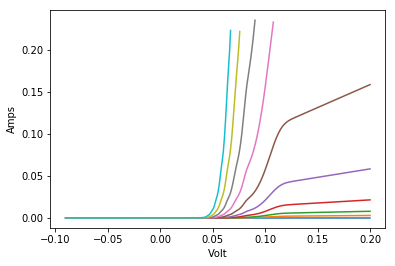

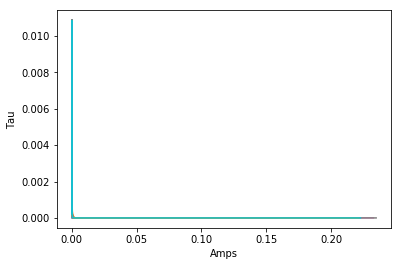

In [25]:
start_scope()
#Implementing the independent Kdr current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKdrmax = 0.01*siemens
zetam = -3/mV
vhalfm = 13*mV
sh = 24*mV
temp = 34
q10 = 1
gmn = 0.7
V0 = -65*mV

eqs = Equations('''
                    dV/dt = (IKdr + I)/C : volt
                    IKdr = gKdr*(V-VKd) : amp
                    gKdr = gKdrmax*mKdr : siemens
                    dmKdr/dt = (infmKdr - mKdr)/taum : 1
                    infmKdr = 1/(1 + alpm) : 1
                    taum = betm/(qt*a0n*(1 + alpm)) : second
                    alpm = exp(0.001*zetam*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    betm = exp(0.001*zetam*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    I : amp

''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

group.mKdr = 1/(1+exp(0.001*zetam*(V0-vhalfm-sh)*96480/(8.315*(273.16 + temp))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, 200, 300)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKdr[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()
#Questions
#What about max/bar conductances (difference in conductance list vs mod files)

In [ ]:
start_scope()
#Implementing the independent Na current.

duration = 100*ms
#Parameters
C = 1*ufarad
gNamax = 0.04*siemens
vhalfs = -60*mV
a0s = 0.0003*ms
zetas = 12/mV
gms = 0.2
q10 = 2
temp = 34
Ra = 0.4/ms
Rb = 0.124/ms
tha = -30*mV
qa = 7.2*mV
sh = 24*mV
thinf = -50*mV
qinf = 4*mV

	thi1  = -45	(mV)		: v 1/2 for inact 	
	thi2  = -45 	(mV)		: v 1/2 for inact 	
	qd   = 1.5	(mV)	        : inact tau slope
	qg   = 1.5      (mV)
	mmin=0.02	
	hmin=0.5			
	Rg   = 0.01 	(/ms)		: inact recov (v) 	
	Rd   = .03 	(/ms)		: inact (v)	
	qq   = 10        (mV)
	tq   = -55      (mV)

inact inf slope 
        smax=10		(ms)
        vvh=-58		(mV) 
        vvs=2		(mV)
        ar=1		(1)		: 1=no inact., 0=max inact.

@check_units(what are the units???)
def trap0(V, th, a, q):
    if (fabs(V-th) > 10**-6):
        return a * (v - th) / (1 - exp(-(v - th)/q))
     else:
        return = a * q

eqs = Equations('''
                    dv/dt = (INa + I)/C : volt
                    INa = gNa*(V - VNa) : amp
                    gNa = gNamax*mNa*mNa*mNa*hNa*sNa : siemens
                    dmNa/dt = (infmNa - mNa)/taum : 1
                    dhNa/dt = (infhNa - hNa)/tauh : 1
                    dsNa/dt = (infsNa - sNa)/taus : 1
        #            infmNa = a/(a + b) : 1
        #            infhNa = 1/(1 + exp((vm-thinf-sh2)/qinf)) : 1
        #            infsNa = c+a2*(1-c) : 1
                    taum = 1/(a + b)/qt : second
                    tauh =  1/(a + b)/qt : second
                    taus = bets/(a0s*(1 + alps)) : second
                    alps = exp(0.001*zetas*(V-vhalfs-sh)*96480/(8.315*(273.16 + temp))) : 1
                    bets = exp(0.001*zetas*gms*(V-vhalfs-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    a = trap0(vm,tha+sh2,Ra,qa)
                    b = trap0(-vm,-tha-sh2,Rb,qa)
                    
#Questions:
#Two different defs for a and b
#Units of trap0
#Whats is vm??
''')

eqs = Equations('''
                    dV/dt = (IKdr + I)/C : volt
                    IKdr = gKdr*(V-VKd) : amp
                    gKdr = gKdrmax*mKdr : siemens
                    dmKdr/dt = (infmKdr - mKdr)/taum : 1
                    infmKdr = 1/(1 + alpm) : 1
                    taum = betm/(qt*a0n*(1 + alpm)) : second
                    alpm = exp(0.001*zetam*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    betm = exp(0.001*zetam*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    I : amp
''')

In [ ]:
start_scope()
#Implementing the independent CaT current.

duration = 100*ms
#Parameters
C = 1*ufarad
gCaTmax = 0.001*siemens
temp = 34
Cai = 50*nmole
Cao = 2 (mM)

v (mV)
	celsius = 25	(degC)
	gcatbar=.003 (mho/cm2)
	cai = 50.e-6 (mM)
	cao = 2 (mM)
	q10 = 5
	mmin=0.2
	hmin=10
	a0h =0.015
	zetah = 3.5
	vhalfh = -75
	gmh=0.6	
	a0m =0.04
	zetam = 2
	vhalfm = -28
	gmm=0.1	

eqs = Equations('''
                    dV/dt = (ICaT + I)/C : volt
                    ICaT = gCaTmax*ghk(V, Cai, Cao)
                    ghk=-f*(1 - ci/co)*exp(nu))*efun(nu)
                    f = KTF(tempf)/2
                    KTF = ((25/293.15)*(temp + 273.15))
                    
                   #What about tempf? temp*f or constant?

''')

gcat = gcatbar*m*m*h
	ica = gcat*ghk(v,cai,cao)


In [ ]:
start_scope()
#Implementing the independent CaN current.

duration = 100*ms
#Parameters
C = 1*ufarad
gCaNmax = 0.001*siemens
q10 = 5
a0m = 0.03
zetam = 2
vhalfm = -14/mV
gmm = 0.1
temp = 34

eqs = Equations('''
                    dV/dt = (ICaN + I)/C : volt
                    ICaN = gCaN*ghk(V, Cai, Cao) : amp
                    gCaN = gCaNmax*mCaN*mCan*hCan*h2(Cai) : siemens
                    dmCaN/dt = (infmCaN - mCaN)/taum : 1
                    dhCan/dt = (infhCaN - hCaN)/tauh : 1
                    infmCaN = alpm*(1/alpm+betm) : 1
                    infhCaN = alph*(1/alph+beth) : 1
                    taum = betmt/(qt*a0m*(1+alpmt)) : second
                    tauh = (1/(alph+beth))/qt : second
                    alpm = 0.1967*(mV**-1)*(-1.0*V+19.88*mV)/(exp((-1.0*V+19.88*mV)/10.0*mV)-1.0) : 1
                    alph = 0.00016*exp(-V/48.4*mV) : 1
                    alpmt = exp(0.0378*zetam*(V-vhalfm)) : 1 
                    betm = 0.046*exp(-V/20.73*mV) : 1
                    beth = 1/(exp((-V+39*mV)/10*mV)+1.) : 1
                    qt = q10^((temp-25)/10) : 1
                    I : amp
                    ''')


group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

In [35]:
Cai = 50*nmole
print(Cai)

50. nmol
